In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
import pandas as pd

In [67]:
with open('pyro_bo_test.pkl', 'rb') as f:
    res_dict = pickle.load(f)


In [82]:
with open('pyro_bo_mrep_40.pkl', 'rb') as f:
    res_dict = pickle.load(f)

In [85]:
len(res_dict['MC']['10'])

28

In [86]:
mc_y = np.array([res['y'] for res in res_dict['MC']['10']])
rqmc_y = np.array([res['y'] for res in res_dict['RQMC']['10']])

In [88]:
mc_x = np.array([res['X'] for res in res_dict['MC']['10']])
rqmc_x = np.array([res['X'] for res in res_dict['RQMC']['10']])

mc_x_reshape = mc_x[:,7:,:].reshape(-1,2)
rqmc_x_reshape = rqmc_x[:,7:,:].reshape(-1,2)

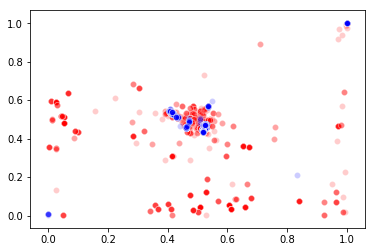

In [89]:
sns.scatterplot(mc_x_reshape[:,0], mc_x_reshape[:,1], color='red', alpha=0.2)
sns.scatterplot(rqmc_x_reshape[:,0], rqmc_x_reshape[:,1], color='blue', alpha=0.2)

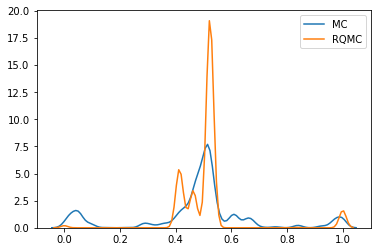

In [90]:
sns.kdeplot(mc_x_reshape[:,0], label='MC')
sns.kdeplot(rqmc_x_reshape[:,0], label='RQMC')

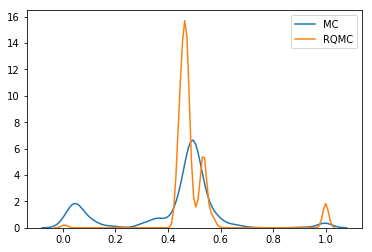

In [91]:
sns.kdeplot(mc_x_reshape[:,1], label='MC')
sns.kdeplot(rqmc_x_reshape[:,1], label='RQMC')

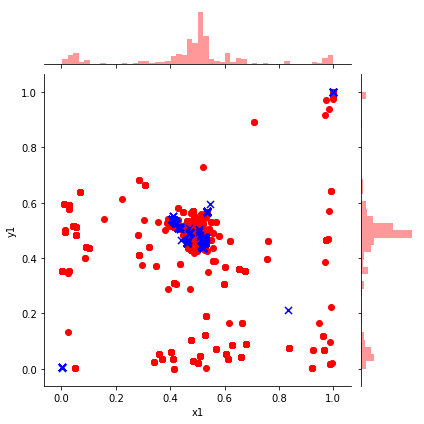

In [92]:
df1 = pd.DataFrame(mc_x_reshape, columns=['x1', 'y1'])
df2 = pd.DataFrame(rqmc_x_reshape, columns=['x2', 'y2'])


# plot
# ========================================   
graph = sns.jointplot(x=df1.x1, y=df1.y1, color='r')

graph.x = df2.x2
graph.y = df2.y2
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)

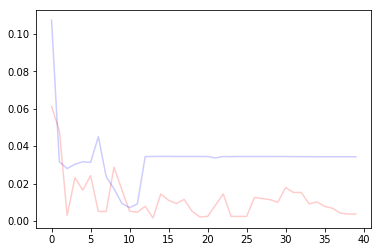

In [112]:
plt.plot(mc_y[:,7:].transpose().min(axis=1),alpha=0.2, color="red" )
plt.plot(rqmc_y[:,7:].transpose().min(axis=1), alpha=0.2, color="blue")

{'boxes': [<matplotlib.lines.Line2D at 0x7f1bbe0fe6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1bbe0fef10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1bbe10aa90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1bbe10a6d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1bbe0fe790>,
  <matplotlib.lines.Line2D at 0x7f1bbe115610>]}

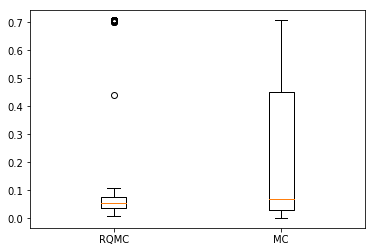

In [96]:
plt.boxplot([rqmc_y[:,7:].flatten(), mc_y[:,7:].flatten()], labels=['RQMC', 'MC'])

-7.0718293 -8.477869


{'boxes': [<matplotlib.lines.Line2D at 0x7f1bbdf52490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1bbdf52cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1bbdf5c850>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1bbdf5c490>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1bbdf52550>,
  <matplotlib.lines.Line2D at 0x7f1bbdf683d0>]}

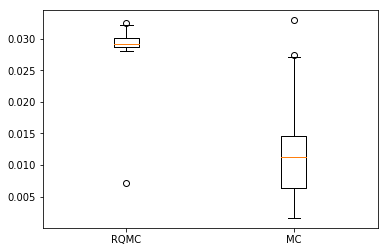

In [104]:
print np.log(np.mean(rqmc_y[:,7:].min(axis=1)**2)), np.log(np.mean(mc_y[:,7:].min(axis=1)**2))
plt.boxplot([rqmc_y[:,7:].min(axis=1), mc_y[:,7:].min(axis=1)], labels=['RQMC', 'MC'])